In [1]:
# inti pembelajaran
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sympy import Matrix
from scipy import sparse
from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import *
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import *
from sklearn.impute import SimpleImputer
from sklearn.ensemble import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import *
from sklearn.linear_model import *
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.decomposition import PCA
from sklearn.tree import *
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import *
from sklearn.svm import *
from scipy.stats import *
from IPython.display import Image
from sklearn.calibration import CalibratedClassifierCV

# library untuk visualisasi decision tree
import pydotplus

# Machine Learning Algorithm

## 1. Linear Regression
Linear regression is one of the simplest supervised learning algorithms  and useful method of making
predictions when the target vector is a quantitative value (e.g., home price, age). 

### 1.1 Fitting a Line

In [30]:
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [31]:
# View the intercept
model.intercept_

22.485628113468223

In [32]:
# View the feature coefficients
# mengembalikan 2 buah nilai karena menggunakan 2 feature
model.coef_

array([-0.35207832,  0.11610909])

In [33]:
# Predict the target value of the first observation, multiplied by 1000
model.predict(features)[0]*1000

24573.366631705547

### 1.2 Handling Interactive Effects
You have a feature whose effect on the target variable depends on another feature.

In [34]:
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create interaction term
interaction = PolynomialFeatures(degree=3, 
                                 include_bias=False, 
                                 interaction_only=True)
features_interaction = interaction.fit_transform(features)

# Create linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(features_interaction, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

Contoh interaksi feature ketika kita ingin membuat coffe yang enak kita memiliki 2 feature yaitu di aduk dan ditambahakan gula. Gula saja tidak akan cukup begitu pula diaduk saja tidak akan cukup, kita membutuhkan keduanya supaya coffe menjadi enak dan hal tersebut dinamakan interaction features.

In [35]:
# View the feature values for first observation
features[0]

array([6.32e-03, 1.80e+01])

To create an interaction term, we simply multiply those two values together for every
observation:

In [36]:
# For each observation, multiply the values of the first and second feature
interaction_term = np.multiply(features[:, 0], features[:, 1])

# View interaction term for first observation
interaction_term[0]

0.11376

We can see the output of PolynomialFeatures from our solution
by checking to see if the first observation’s feature values and interaction term value
match our manually calculated version:

In [38]:
# View the values of the first observation
features_interaction[0]

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

### 1.3 Fitting a Nonlinear Relationship

In [68]:
# Load data with one feature
boston = load_boston()
features = boston.data[:,:1]
target = boston.target

# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, 
                                include_bias=False)
features_polynomial = polynomial.fit_transform(features)

# Create linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(features_polynomial, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [69]:
# View first observation
features[0]

array([0.00632])

In [70]:
# View first observation raised to the second power, x^2
features[0]**2

array([3.99424e-05])

In [71]:
# View first observation raised to the third power, x^3
features[0]**3

array([2.52435968e-07])

In [72]:
# View the first observation's values for x, x^2, and x^3
features_polynomial[0]

array([6.32000000e-03, 3.99424000e-05, 2.52435968e-07])

### 1.4 Reducing Variance with Regularization

In [73]:
# Load data
boston = load_boston()
features = boston.data
target = boston.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)

# Fit the linear regression
model = regression.fit(features_standardized, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

scikit-learn includes a RidgeCV method that allows us to select the ideal value for α

In [74]:
# Create ridge regression with three alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# Fit the linear regression
model_cv = regr_cv.fit(features_standardized, target)

# View coefficients
model_cv.coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [77]:
# view the best model’s α value
model_cv.alpha_

1.0

*karena dalam regresi linier nilai koefisien sebagian ditentukan oleh skala fitur, dan dalam model regularisasi semua koefisien dijumlahkan, kita harus memastikan untuk membakukan fitur sebelum pelatihan.*

### 1.5 Reducing Features with Lasso Regression

In [78]:
# Load data
boston = load_boston()
features = boston.data
target = boston.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create lasso regression with alpha value
regression = Lasso(alpha=0.5)

# Fit the linear regression
model = regression.fit(features_standardized, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

*Salah satu karakteristik menarik dari penalti regresi laso adalah dapat mengecilkan koefisien model menjadi nol, secara efektif mengurangi jumlah fitur dalam model. Misalnya, dalam solusi kami, kami menetapkan alfa ke 0,5 dan kami dapat melihat bahwa banyak dari koefisiennya adalah 0, artinya fitur yang sesuai tidak digunakan dalam model*

In [79]:
# View coefficients
model.coef_

array([-0.11526463,  0.        , -0.        ,  0.39707879, -0.        ,
        2.97425861, -0.        , -0.17056942, -0.        , -0.        ,
       -1.59844856,  0.54313871, -3.66614361])

## 2. Trees and Forests
The basis of
tree-based learners is the decision tree wherein a series of decision rules (e.g., “If their
gender is male…”) are chained. 

### 2.1 Training a Decision Tree Classifier

In [4]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [13]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
iris.target_names[model.predict(observation)]

array(['versicolor'], dtype='<U10')

In [6]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

Finally, if we want to use a different impurity measurement we can use the criterion
parameter:

In [7]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', 
                                              random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

### 2.2 Training a Decision Tree Regressor
Decision tree regression works similarly to decision tree classification; however,
instead of reducing Gini impurity or entropy, potential splits are by default measured
on how much they reduce mean squared error (MSE)

In [14]:
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [15]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

In [17]:
# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

### 2.3 Visualizing a Decision Tree Model

In [4]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

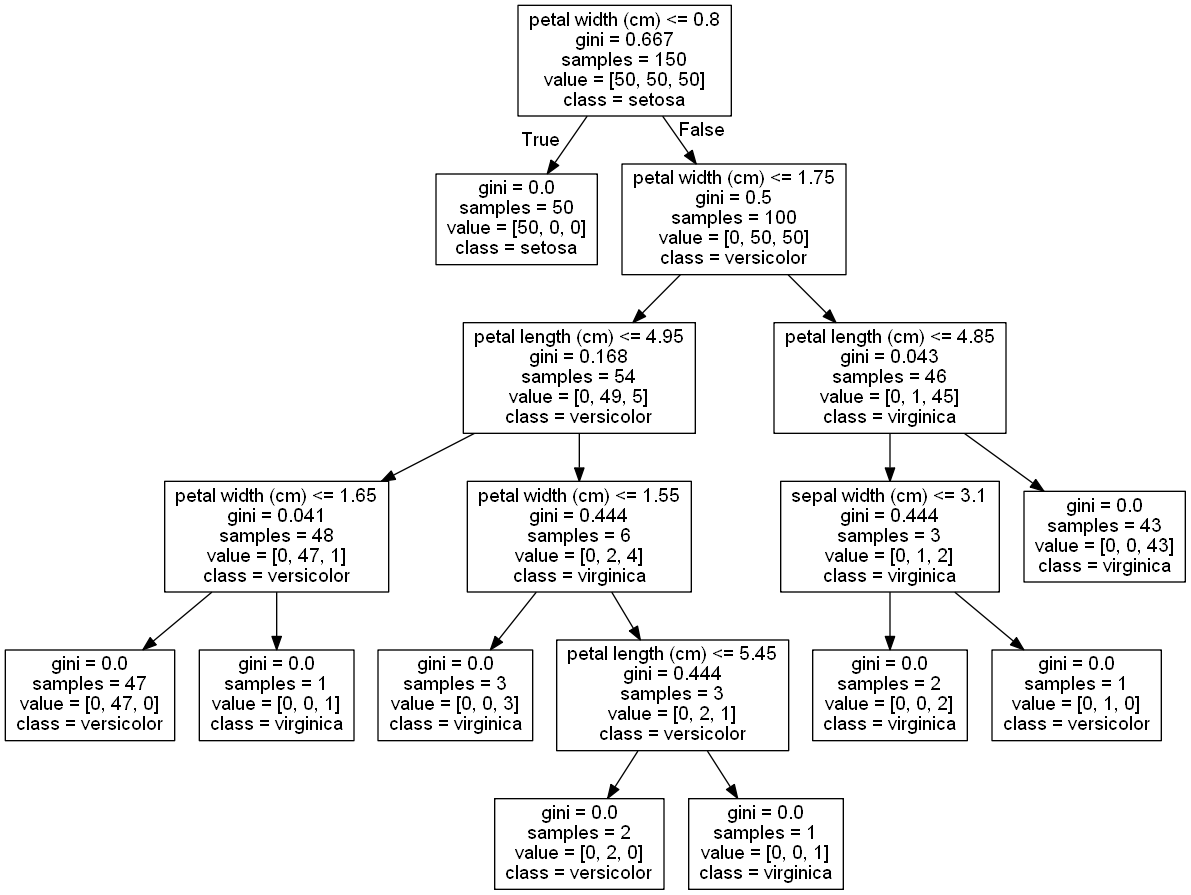

In [5]:
# visualisasing a decision tree
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

If we want to use the decision tree in other applications or reports, we can easily
export the visualization into PDF or a PNG image:

In [6]:
# Create PDF
graph.write_pdf("iris.pdf")

True

In [7]:
# Create PNG
graph.write_png("iris.png")

True

### 2.4 Training a Random Forest Classifier

In [8]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [9]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
iris.target_names[model.predict(observation)]

array(['versicolor'], dtype='<U10')

`RandomForestClassifier` also uses many of the same parameters as `DecisionTreeClassifier`. For example, we can change the measure of split quality used:

In [10]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion="entropy", 
                                              random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

### 2.5 Training a Random Forest Regressor

In [13]:
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [14]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([30.316])

### 2.6 Identifying Important Features in Random Forests

In [2]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in ascending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

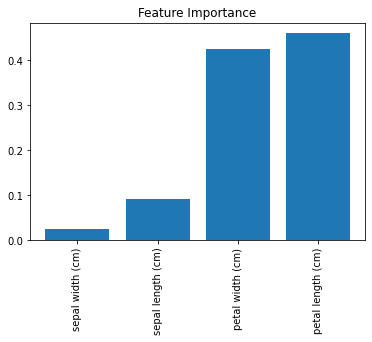

In [3]:
# plotting importances features
plt.figure()
plt.title("Feature Importance")
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

In scikit-learn, classification and regression decision trees and random forests can
report the relative importance of each feature

In [4]:
# View feature importances
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [22]:
observation = [0.09090795, 0.02453104, 0.46044474, 0.42411627]

iris.target_names[model.predict([observation])]

array(['setosa'], dtype='<U10')

### 2.7 Selecting Important Features in Random Forests
Identify the importance features and retrain the model using only the most important
features

In [25]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important featres
model = randomforest.fit(features_important, target)

*There are situations where we might want to reduce the number of features in our
model. For example, we might want to reduce the model’s variance or we might want
to improve interpretability by including only the most important features*

In [32]:
model.feature_importances_

array([0.51108238, 0.48891762])

In [33]:
# Make new observation
observation = [[ 5, 4]]

# Predict observation's class
iris.target_names[model.predict(observation)]

array(['virginica'], dtype='<U10')

### 2.8 Handling Imbalanced Classes

In [5]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, 
                                      n_jobs=-1, 
                                      class_weight="balanced")

# Train model
model = randomforest.fit(features, target)

### 2.9 Controlling Tree Size

In [7]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

# Train model
model = decisiontree.fit(features, target)

### 2.10 Improving Performance Through Boosting

In [10]:
# Load data
iris = load_iris()
features = iris['data']
target = iris['target']

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)

### 2.11 Evaluating Random Forests with Out-of-Bag Errors

In [11]:
# load data
iris = load_iris()
features = iris.data
target = iris.target

# Create random tree classifier object
randomforest = RandomForestClassifier(random_state=0, 
                                      n_estimators=1000, 
                                      oob_score=True, 
                                      n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334

## 3. K-Nearest Neighbors
KNN sering dianggap sebagai pembelajar yang malas; itu tidak secara teknis melatih model untuk membuat prediksi. Sebaliknya sebuah observasi diprediksi menjadi kelas dari proporsi terbesar dari k observasi terdekat. Misalnya, jika sebuah observasi dengan kelas yang tidak diketahui dikelilingi oleh observasi kelas 1, maka observasi tersebut diklasifikasikan sebagai kelas 1.

### 3.1 Finding an Observation’s Nearest Neighbors

In [15]:
# Load data
iris = load_iris()
features = iris.data

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# Create an observation
new_observation = [ 1, 1, 1, 1]

# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

indeks berisi lokasi pengamatan dalam kumpulan data kami yang paling dekat, jadi X[indeks] menampilkan nilai pengamatan tersebut.
<img src='distance.png'>
where xi
 and yi
 are the two observations we are calculating the distance between.
Minkowski includes a hyperparameter, p, where p = 1 is Manhattan distance and p =
2 is Euclidean distance, and so on. By default in scikit-learn p = 2.

In [16]:
# Find two nearest neighbors based on euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, 
                                              metric='euclidean')
nearestneighbors_euclidean.fit(features_standardized)

NearestNeighbors(metric='euclidean', n_neighbors=2)

The distance variable we created contains the actual distance measurement to each
of the two nearest neighbors:

In [17]:
# View distances
distances

array([[0.49140089, 0.74294782]])

In addition, we can use kneighbors_graph to create a matrix indicating each observation’s nearest neighbors:

In [18]:
# Find each observation's three nearest neighbors
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, 
                                              metric='euclidean')
nearestneighbors_euclidean.fit(features_standardized)

# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
    features_standardized).toarray()

# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 3.2 Creating a K-Nearest Neighbor Classifier

In [20]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Create standardizer & tandardize features
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

In [22]:
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
                    [ 1, 1, 1, 1]]

# Predict the class of two observations
iris.target_names[knn.predict(new_observations)]

array(['versicolor', 'virginica'], dtype='<U10')

In [23]:
# View probability each observation is one of three classes
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

*The class with the highest probability becomes the predicted class.*

### 3.3 Identifying the Best Neighborhood Size

In [24]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Create standardizer & tandardize features
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), 
                 ("knn", knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": list(range(1,11))}]

# Create grid search
classifier = GridSearchCV(pipe, 
                          search_space, 
                          cv=5, 
                          verbose=0)
classifier.fit(features_standardized, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}])

In [25]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

### 3.4 Creating a Radius-Based Nearest Neighbor Classifier

In [26]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Create standardizer & standardize features
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, 
                                n_jobs=-1)
rnn.fit(features_standardized, target)

RadiusNeighborsClassifier(n_jobs=-1, radius=0.5)

In [28]:
# Create two observations
new_observations = [[ 1, 1, 1, 1]]

# Predict the class of two observations
iris.target_names[rnn.predict(new_observations)]

array(['virginica'], dtype='<U10')

## 4. Logistic Regression
 Logistic regression and its extensions, like multinomial
logistic regression, allow us to predict the probability that an observation is of a certain class using a straightforward and well-understood approach.

### 4.1 Training a Binary Classifier

In [2]:
# Load data with only two classes
iris = load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)

# Train model
model = logistic_regression.fit(features_standardized, target)

In [3]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]

# Predict class
prediksi = model.predict(new_observation)
iris.target_names[prediksi]

array(['versicolor'], dtype='<U10')

In [4]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.17738424, 0.82261576]])

pada prediksi kita memiliki probabilitas untuk mengklasifikasikan ke klas 0 sebanyak 17% sedangkan probabilitas untuk mengklasifikasikan ke dalam kelas 1 sebanyak 83%

### 4.2 Training a Multiclass Classifier

In [5]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, 
                                         multi_class="ovr")

# Train model
model = logistic_regression.fit(features_standardized, target)

Logistic regression hanya dapat mengkalsifikasikan 2 kelas, tetapi dengan hyperparameter atau extension dapat membuat logistic regression untuk mengklasifikasikan banyak kelas dengan prinsip one vs rest (OVR).

### 4.3 Reducing Variance Through Regularization

In [8]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create decision tree classifier object
logistic_regression = LogisticRegressionCV(penalty='l2', 
                                           Cs=10, 
                                           random_state=0,
                                           n_jobs=-1)

# Train model
model = logistic_regression.fit(features_standardized, target)

Regularization is a method of penalizing complex models to reduce their variance.
Specifically, a penalty term is added to the loss function we are trying to minimize,
typically the L1 and L2 penalties

### 4.4 Training a Classifier on Very Large Data

In [9]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0,
                                         solver="sag")

# Train model
model = logistic_regression.fit(features_standardized, target)

### 4.5 Handling Imbalanced Classes

In [14]:
iris = load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create decision tree classifier object
logistic_regression = LogisticRegression(random_state=0,
                                         class_weight="balanced")

# Train model
model = logistic_regression.fit(features_standardized, target)

## 5. Support Vector Machines
To understand support vector machines, we must understand hyperplanes. Formally,
a hyperplane is an n – 1 subspace in an n-dimensional space.  A hyperplane is simply a generalization of that concept into n dimensions.

### 5.1 Training a Linear Classifier

In [17]:
# Load data with only two classes and two features
iris = load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(features_standardized, target)

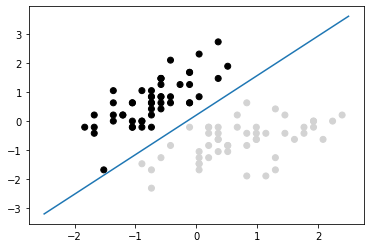

In [19]:
#  Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.show();

In [20]:
# Create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

*C, the penalty imposed on errors. C is a parameter of the SVC learner and is the pen‐
alty for misclassifying a data point. When C is small, the classifier is okay with mis‐
classified data points (high bias but low variance). When C is large, the classifier is
heavily penalized for misclassified data and therefore bends over backwards to avoid
any misclassified data points (low bias but high variance).*

### 5.2 Handling Linearly Inseparable Classes Using Kernels

In [5]:
# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate 
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

In [7]:
# Plot observations and decision boundary hyperplane
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

In [8]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Train model
svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

Next, since we have only two features, we are working in a two-dimensional space
and can visualize the observations, their classes, and our model’s linear hyperplane:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


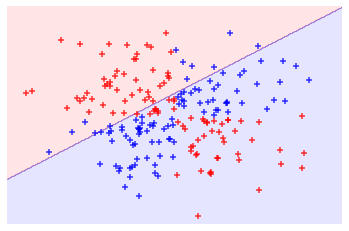

In [11]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off')
plt.show()

As we can see, our linear hyperplane did very poorly at dividing the two classes! Now,
let’s swap out the linear kernel with a radial basis function kernel and use it to train a
new model:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


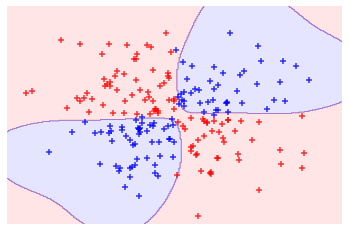

In [12]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

### 5.3 Creating Predicted Probabilities

In [16]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

### 5.4 Identifying Support Vectors

In [18]:
#Load data with only two classes
iris = load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

After we have trained an SVC, scikit-learn offers us a number of options for identify‐
ing the support vector. In our solution, we used support_vectors_ to output the
actual observations’ features of the four support vectors in our model. Alternatively,
we can view the indices of the support vectors using support_:

In [19]:
model.support_

array([23, 41, 57, 98])

In [20]:
model.n_support_

array([2, 2])

### 5.5 Handling Imbalanced Classes

In [21]:
#Load data with only two classes
iris = load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

*In scikit-learn, when using SVC we can set the values for Cj
 automatically by setting
class_weight='balanced'. The balanced argument automatically weighs classes*

## 6. Naive Bayes
Naive Bayes menggunakan pengetahuan probabilitas yang paling mendasar dan membuat asumsi naif bahwa semua fitur adalah independen. Terlepas dari kesederhanaannya (beberapa orang mungkin mengatakan penyederhanaan berlebihan), Naive Bayes memberikan kinerja yang layak di banyak aplikasi.

In [3]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

classifer = GaussianNB()
model = classifer.fit(features, target)

*In Gaussian naive Bayes, we assume that the likelihood of the feature values, x, given an
observation is of class y, follows a normal distribution*

In [5]:
# predict new observation 
new = [4, 4, 4, 0.5]
prediksi = model.predict([new])
iris.target_names[prediksi]

array(['versicolor'], dtype='<U10')

One of the interesting aspects of naive Bayes classifiers is that they allow us to assign a
prior belief over the respected target classes.

In [6]:
# Create Gaussian Naive Bayes object with prior probabilities of each class
clf = GaussianNB(priors=[0.25, 0.25, 0.5])

# Train model
model = classifer.fit(features, target)

### 6.2 Training a Classifier for Discrete and Count Features

In [10]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                      'Brazil is best',
                      'Germany beats both'])

# Create bag of words
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# Create feature matrix
features = bag_of_words.toarray()

# Create target vector
target = np.array([0,0,1])

# Create multinomial naive Bayes object with prior probabilities of each class
classifer = MultinomialNB(class_prior=[0.25, 0.5])

# Train model
model = classifer.fit(features, target)

In [16]:
# Create new observation
new_observation = [[0, 0, 0, 1, 0, 1, 0]]

# Predict new observation's class
model.predict(new_observation)

array([0])

### 6.3  Training a Naive Bayes Classifier for Binary Features

In [17]:
# Create three binary features
features = np.random.randint(2, size=(100, 3))

# Create a binary target vector
target = np.random.randint(2, size=(100, 1)).ravel()

# Create Bernoulli Naive Bayes object 
# with prior probabilities of each class
classifer = BernoulliNB(class_prior=[0.25, 0.5])

# Train model
model = classifer.fit(features, target)

The Bernoulli naive Bayes classifier assumes that all our features are binary such that
they take only two values (e.g., a nominal categorical feature that has been one-hot
encoded).

### 6.4 Calibrating Predicted Probabilities
calibrate the predicted probabilities from naive Bayes classifiers in order to interpretable.

In [21]:
# Load data
iris = load_iris()
features = iris.data
target = iris.target

# Create Gaussian Naive Bayes object
classifer = GaussianNB()

# Create calibrated cross-validation with sigmoid calibration
classifer_sigmoid = CalibratedClassifierCV(classifer, 
                                           cv=2, 
                                           method='sigmoid')
# Calibrate probabilities
classifer_sigmoid.fit(features, target)

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=2)

In [22]:
# Create new observation and View calibrated probabilities
new_observation = [[ 2.6, 2.6, 2.6, 0.4]]
classifer_sigmoid.predict_proba(new_observation)

array([[0.31859969, 0.63663466, 0.04476565]])

*Untuk mendapatkan probabilitas prediksi yang berarti, kita perlu melakukan apa yang disebut kalibrasi. tion. Dalam scikit-learn kita dapat menggunakan kelas CalibratedClassifierCV untuk membuat probabilitas prediksi yang dikalibrasi dengan baik menggunakan validasi silang k-fold. Di CalibratedClassi fierCV set pelatihan digunakan untuk melatih model dan set tes digunakan untuk mengkalibrasi probabilitas yang diprediksi. Probabilitas prediksi yang dikembalikan adalah rata-rata dari k-folds. Dengan menggunakan solusi kami, kami dapat melihat perbedaan antara probabilitas terprediksi mentah dan terkalibrasi dengan baik. Dalam solusi kami, kami membuat pengklasifikasi Gaussian naive Bayes. Jika kita melatih pengklasifikasi itu dan kemudian memprediksi probabilitas kelas untuk pengamatan baru, kita dapat melihat perkiraan probabilitas yang sangat ekstrim*

In [23]:
# Train a Gaussian naive Bayes then predict class probabilities
classifer.fit(features, target).predict_proba(new_observation)

array([[2.31548432e-04, 9.99768128e-01, 3.23532277e-07]])

## 7. Clustering

Klaster (cluster) adalah sebuah grup yang memiliki kemiripan tertentu. Pengklasteran adalah sebuah metode machine learning unsupervised untuk mengelompokkan objek-objek yang memiliki kemiripan, ke dalam sebuah klaster.

### 7.1 Clustering Using K-Means

In [26]:
# Load data
iris = load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = KMeans(n_clusters=3, 
                 random_state=0)

# Train model
model = cluster.fit(features_std)

In [30]:
# View predict class
akurasi = (sum(model.labels_ == iris.target)/ len(iris.target)).mean()
akurasi

0.24

In [34]:
# view predict class and true class
for predict,true in zip(model.labels_[:11], iris.target[:11]):
    print(f'{predict} == {true}')

1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0
1 == 0


However, as you might imagine, the performance of k-means drops considerably,
even critically, if we select the wrong number of clusters

In [40]:
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# Predict observation's cluster
model.predict(new_observation)

array([2])

In [41]:
# View cluster centers
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

### 7.2 Speeding Up K-Means Clustering
 want to group observations into k groups, but k-means takes too long.

In [45]:
# Load data
iris = load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, 
                          random_state=0, 
                          batch_size=100)

# Train model
model = cluster.fit(features_std)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


### 7.3 Clustering Using Meanshift
Mengelompokkan pengamatan tanpa mengasumsikan jumlah cluster atau bentuknya

In [46]:
# Load data
iris = load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = MeanShift(n_jobs=-1)

# Train model
model = cluster.fit(features_std)

*Analogi dari meanshift clustering: Bayangkan sebuah lapangan sepak bola yang sangat berkabut (yaitu, ruang fitur dua dimensi) dengan 100 orang berdiri di atasnya (yaitu, pengamatan kami). Karena berkabut, seseorang hanya bisa melihat jarak dekat. Setiap menit setiap orang melihat sekeliling dan mengambil langkah ke arah orang yang paling banyak mereka lihat. Seiring berjalannya waktu, orang-orang mulai berkelompok saat mereka berulang kali mengambil langkah menuju kerumunan yang lebih besar dan lebih besar. Hasil akhirnya adalah sekelompok orang di sekitar lapangan. Orang-orang ditugaskan ke kelompok di mana mereka berakhir.*

### 7.4 Clustering Using DBSCAN

In [48]:
# Load data
iris = load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = DBSCAN(n_jobs=-1)

# Train model
model = cluster.fit(features_std)

In [54]:
# Show cluster membership
model.labels_[:20]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0], dtype=int64)

### 7.5 Clustering Using Hierarchical Merging

In [55]:
# Load data
iris = load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = AgglomerativeClustering(n_clusters=3)

# Train model
model = cluster.fit(features_std)

In [56]:
# Show cluster membership
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)